# Network Topology

This notebook contains code for constructing, visualizing, and controlling aging in Erdos-Renyi random networks and Barabasi-Albert scale-free networks. The main network used in the paper was the Gilbert random network and the corresponding figures for it can be found in the notebooks: 'model_visualization.ipynb' and 'nonlinear_control.ipynb'. The code here corresponds to Figure S6 in the supplementary material for the paper.

In [1]:
from model import *
from ode_solver import *

## Erdos-Renyi G(N,m) random network

### Figure S4a: Vitality $\phi(t)$ as a function of time in an interdependent network compared to the linear theory

In [ ]:
simPopulation('ERfinal', pop_size=50, N=1000, p=0.1, d=0, f=0.025, r=0, f_thresh=0.01,
    graph_type='ERrandom_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
    costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
    node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
    P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,save='yes',write_inds='yes')

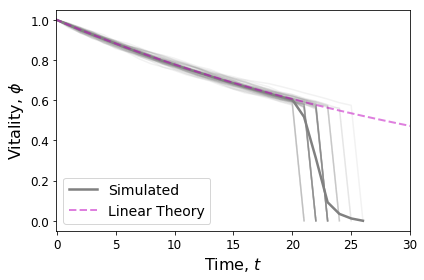

In [8]:
f=0.025
r=0
alpha=10
phi0 = 1
I_list = [0.5]
n = round(0.1*(999))
t = np.linspace(0, 100, 101)

simulated_vits = []
for fn in os.listdir('./Data/'):
    if 'ERfinal' in fn:
        if 'MEAN' in fn:
            mean_vit = np.genfromtxt('./Data/'+fn,delimiter=',')
        else:
            simulated_vits.append(np.genfromtxt('./Data/'+fn,delimiter=',')[0,:])

for i, vit in enumerate(simulated_vits):
    if i == 0:
        plt.plot(np.arange(0,len(vit),1), vit, color='0.5', alpha=0.1)#, label='Simulated')
    else:
        plt.plot(np.arange(0,len(vit),1), vit, color='0.5', alpha=0.1)

plt.plot(np.arange(0,len(mean_vit[0,:]),1), mean_vit[0,:],linewidth=2.5,color='0.5',label='Simulated')


# Plot
r=0
vitality_theory = [(np.exp((-f-r)*(time-1))*(f+np.exp((f+r)*(time-1))*r))/(f+r) for time in t]
plt.plot([time-1 for time in t], vitality_theory, color='m', linestyle='--', alpha=0.5, linewidth=2.0, label='Linear Theory')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Time, $t$", fontsize=16)
plt.ylabel("Vitality, $\phi$", fontsize=16)
plt.ylim([-0.05,1.05])
plt.xlim([-0.05, 30])
plt.legend(loc='lower left',fontsize=14)
plt.tight_layout()
filename = 'ERfinal'
plt.savefig('Figures/'+filename+'_vitality', dpi=800)
plt.show()

### Figure S4d: Nonlinear optimal control for different costs of repair $\alpha$

C:\Users\edsun\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


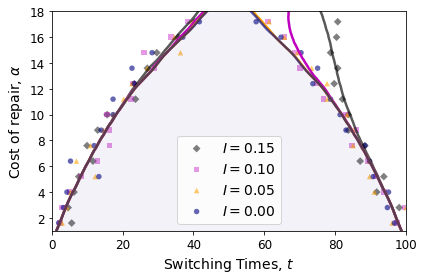

In [21]:
from scipy.signal import savgol_filter

colors = ['#000080', '#FFA500', 'm', 'k', '#FFC0CB']
markers = ['o', '^', 's', 'D', '*']
transparencies = [0.6, 0.6, 0.4, 0.5, 1.0]

filelist2=['Erdos_Renyi/0.1/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist3=['Erdos_Renyi/0.15/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist1=['Erdos_Renyi/0/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist5=['Erdos_Renyi/0.05/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']

f = 0.025
alpha=10
T = 100
parameter_list = np.arange(0,20,0.4)


def bin_data (x, y, n):
    '''
    x = array of x-value lists
    y = array of y-value lists
    n = number of points that each binned average will contain
    '''
    k = 0
    new_x = []
    new_y = []
    
    running_avg_x = 0
    running_avg_y = 0
    
    while k < len(x):
        if k%n == 0 and k>0:
            new_x.append(running_avg_x)
            new_y.append(running_avg_y)
            running_avg_x = 0
            running_avg_y = 0
        running_avg_x += x[k]/n
        running_avg_y += y[k]/n
        k+= 1
        
    return (new_x, new_y)


#plt.figure(figsize=(6,3))
plt.figure()

        
for n, filename in enumerate(filelist3):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_f = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[3], marker=markers[3], alpha=transparencies[3], s=30, edgecolors='none', label='$I=0.15$') # 0.15
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[3], marker=markers[3], alpha=transparencies[3], s=30, edgecolors='none')#, label='$I=0.15$') # 0.15


for n, filename in enumerate(filelist2):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_e = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[2], marker=markers[2], alpha=transparencies[2], s=30, edgecolors='none', label='$I=0.10$') # 0.1
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[2], marker=markers[2], alpha=transparencies[2], s=30, edgecolors='none')#, label='$I=0.10$') # 0.1


for n, filename in enumerate(filelist5):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_h = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[1], marker=markers[1], alpha=transparencies[1], s=30, edgecolors='none', label='$I=0.05$') # 0.05
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[1], marker=markers[1], alpha=transparencies[1], s=30, edgecolors='none')#, label='$I=0.05$') # 0.05



for n, filename in enumerate(filelist1):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_d = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[0], marker=markers[0], alpha=transparencies[0], s=30, edgecolors='none', label='$I=0.00$') # 0
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[0], marker=markers[0], alpha=transparencies[0], s=30, edgecolors='none')#, label='$I=0.00$') # 0


# Read in numerical results and plot
I_thresh = 0.2

def extract(raw_string, start_marker, end_marker):
    start = raw_string.index(start_marker) + len(start_marker)
    end = raw_string.index(end_marker, start)
    return (raw_string[start:end])

alpha_list = []
T1_dict= {}
T2_dict = {}

dirs = [x[0] for x in os.walk('./TOMLAB_data/alpha/')]
dirs = dirs[1:]
for d_idx, d in enumerate(dirs):
    files = [f for f in os.listdir(d)]
    for f_idx, f in enumerate(files):
        if 'nonlin_alpha_' in f:
            # Extract alpha value
            alpha = float(extract(d+'/'+f,'alpha_','.csv'))
            alpha_list.append(alpha)
            # Read I, T1, T2
            results_mat = np.genfromtxt(d+'/'+f,delimiter=',')
            I_vals = results_mat[0,:]
            T1_list = results_mat[1,:]
            T2_list = results_mat[2,:]
        
            for i, I in enumerate(I_vals):
                if I < I_thresh:
                    if str(I) not in T1_dict:
                        T1_dict[str(I)] = []
                        T2_dict[str(I)] = []
                    if d_idx == 0:
                        T1_dict[str(I)].append(T1_list[i])
                        T2_dict[str(I)].append(T2_list[i])
                    else:
                        T1_dict[str(I)][f_idx] += T1_list[i]
                        T2_dict[str(I)][f_idx] += T2_list[i]

k = 0
for i, I in enumerate(I_vals[::-1]):
    norm = 1/len(dirs)
    if I in [0., 0.05, 0.1, 0.15, 0.2]:
        if I < I_thresh:
            sorted_T1_lists = [list(x) for x in zip(*sorted(zip(alpha_list, T1_dict[str(I)]), key=lambda pair: pair[0]))]
            sorted_alpha_list = sorted_T1_lists[0]
            sorted_T1_list = sorted_T1_lists[1]
            sorted_T2_lists = [list(x) for x in zip(*sorted(zip(alpha_list, T2_dict[str(I)]), key=lambda pair: pair[0]))]
            sorted_T2_list = sorted_T2_lists[1]

            norm_T1 = norm*np.array(sorted_T1_list)
            norm_T2 = norm*np.array(sorted_T2_list)
            
            # Smoothen with SG filter
            norm_T1 = savgol_filter(norm_T1, 11, 2)
            norm_T2 = savgol_filter(norm_T2, 11, 2)
            
            if colors[::-1][k] == 'k':
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)#, linestyle='--')
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)#, linestyle='--')
            elif colors[::-1][k] == '#000080':
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5) 
            else:
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], linewidth=2.5)#, linestyle='--')
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], linewidth=2.5)#, linestyle='--')
                
            # shading
            if I == 0:
                plt.fill_betweenx(sorted_alpha_list, norm_T1, norm_T2, color='#000080', alpha=0.05)
        k+=1

#plt.scatter(parameter_list/2.5, T_list_g, color='magenta') # 0.25
plt.xlabel('Switching Times, $t$', fontsize=14)
plt.ylabel('Cost of repair, '+r'$\alpha$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim(0,100)
plt.ylim(1,18)
#plt.legend(loc='upper right')
plt.legend(loc='lower center', fontsize=14, borderaxespad=0.5)
plt.tight_layout()
plt.savefig('Nonlinear_ER.png', dpi=800)
plt.show()

## Barabasi-Albert scale-free network

### Figure S4b:  Vitality $\phi(t)$ as a function of time in an interdependent network compared to the linear theory

In [ ]:
simPopulation('BA_final', pop_size=50, N=1000, p=0.1, d=0, f=0.025, r=0, f_thresh=0.01,
    graph_type='scale_free_s', weight_type='uniform', check_type='none', kinetic=1, P_check=1, e=0, cost_type=['healthspan_quadratic', 8000], 
    costC=0.1, costR=1, costE=0.5, costD=0.5, costL=1, P_repl=0, costrepl=1, max_repl=1, repl_type='constant',
    node_type='binary', damage_type='uniform', edge_type='binary', f_edge=0, r_edge=0, std=0.3, 
    P_ablate=0,costablate=1,ablate_type='constant',repair_start=0,repair_end=100,delay=0,time_end=100,dependency=0.5,save='yes',write_inds='yes')

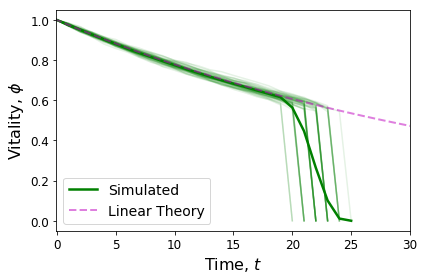

In [9]:
f=0.025
r=0
alpha=10
phi0 = 1
I_list = [0.5]
n = round(0.1*(999))
t = np.linspace(0, 100, 101)

simulated_vits = []
for fn in os.listdir('./Data/'):
    if 'BA_final' in fn:
        if 'MEAN' in fn:
            mean_vit = np.genfromtxt('./Data/'+fn,delimiter=',')
        else:
            simulated_vits.append(np.genfromtxt('./Data/'+fn,delimiter=',')[0,:])

for i, vit in enumerate(simulated_vits):
    if i == 0:
        plt.plot(np.arange(0,len(vit),1), vit, color='g', alpha=0.1)#, label='Simulated')
    else:
        plt.plot(np.arange(0,len(vit),1), vit, color='g', alpha=0.1)

plt.plot(np.arange(0,len(mean_vit[0,:]),1), mean_vit[0,:],linewidth=2.5,color='g',label='Simulated')


# Plot
r=0
vitality_theory = [(np.exp((-f-r)*(time-1))*(f+np.exp((f+r)*(time-1))*r))/(f+r) for time in t]
plt.plot([time-1 for time in t], vitality_theory, color='m', linestyle='--', alpha=0.5, linewidth=2.0, label='Linear Theory')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Time, $t$", fontsize=16)
plt.ylabel("Vitality, $\phi$", fontsize=16)
plt.ylim([-0.05,1.05])
plt.xlim([-0.05, 30])
plt.legend(loc='lower left',fontsize=14)
plt.tight_layout()
filename = 'BA_final'
plt.savefig('Figures/'+filename+'_vitality', dpi=800)
plt.show()

### Figure S4e: Nonlinear optimal control for different costs of repair $\alpha$

C:\Users\edsun\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


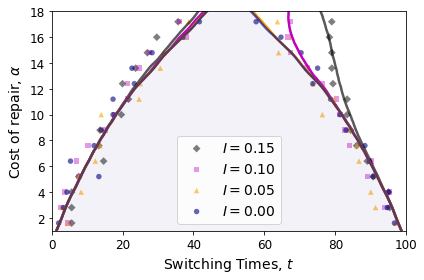

In [20]:
from scipy.signal import savgol_filter

colors = ['#000080', '#FFA500', 'm', 'k', '#FFC0CB']
markers = ['o', '^', 's', 'D', '*']
transparencies = [0.6, 0.6, 0.4, 0.5, 1.0]

filelist2=['Barabasi_Albert/0.1/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist3=['Barabasi_Albert/0.15/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist1=['Barabasi_Albert/0/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist5=['Barabasi_Albert/0.05/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']

f = 0.025
alpha=10
T = 100
parameter_list = np.arange(0,20,0.4)


def bin_data (x, y, n):
    '''
    x = array of x-value lists
    y = array of y-value lists
    n = number of points that each binned average will contain
    '''
    k = 0
    new_x = []
    new_y = []
    
    running_avg_x = 0
    running_avg_y = 0
    
    while k < len(x):
        if k%n == 0 and k>0:
            new_x.append(running_avg_x)
            new_y.append(running_avg_y)
            running_avg_x = 0
            running_avg_y = 0
        running_avg_x += x[k]/n
        running_avg_y += y[k]/n
        k+= 1
        
    return (new_x, new_y)


#plt.figure(figsize=(6,3))
plt.figure()

        
for n, filename in enumerate(filelist3):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_f = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[3], marker=markers[3], alpha=transparencies[3], s=30, edgecolors='none', label='$I=0.15$') # 0.15
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[3], marker=markers[3], alpha=transparencies[3], s=30, edgecolors='none')#, label='$I=0.15$') # 0.15


for n, filename in enumerate(filelist2):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_e = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[2], marker=markers[2], alpha=transparencies[2], s=30, edgecolors='none', label='$I=0.10$') # 0.1
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[2], marker=markers[2], alpha=transparencies[2], s=30, edgecolors='none')#, label='$I=0.10$') # 0.1


for n, filename in enumerate(filelist5):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_h = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[1], marker=markers[1], alpha=transparencies[1], s=30, edgecolors='none', label='$I=0.05$') # 0.05
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[1], marker=markers[1], alpha=transparencies[1], s=30, edgecolors='none')#, label='$I=0.05$') # 0.05



for n, filename in enumerate(filelist1):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_d = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[0], marker=markers[0], alpha=transparencies[0], s=30, edgecolors='none', label='$I=0.00$') # 0
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[0], marker=markers[0], alpha=transparencies[0], s=30, edgecolors='none')#, label='$I=0.00$') # 0


# Read in numerical results and plot
I_thresh = 0.2

def extract(raw_string, start_marker, end_marker):
    start = raw_string.index(start_marker) + len(start_marker)
    end = raw_string.index(end_marker, start)
    return (raw_string[start:end])

alpha_list = []
T1_dict= {}
T2_dict = {}

dirs = [x[0] for x in os.walk('./TOMLAB_data/alpha/')]
dirs = dirs[1:]
for d_idx, d in enumerate(dirs):
    files = [f for f in os.listdir(d)]
    for f_idx, f in enumerate(files):
        if 'nonlin_alpha_' in f:
            # Extract alpha value
            alpha = float(extract(d+'/'+f,'alpha_','.csv'))
            alpha_list.append(alpha)
            # Read I, T1, T2
            results_mat = np.genfromtxt(d+'/'+f,delimiter=',')
            I_vals = results_mat[0,:]
            T1_list = results_mat[1,:]
            T2_list = results_mat[2,:]
        
            for i, I in enumerate(I_vals):
                if I < I_thresh:
                    if str(I) not in T1_dict:
                        T1_dict[str(I)] = []
                        T2_dict[str(I)] = []
                    if d_idx == 0:
                        T1_dict[str(I)].append(T1_list[i])
                        T2_dict[str(I)].append(T2_list[i])
                    else:
                        T1_dict[str(I)][f_idx] += T1_list[i]
                        T2_dict[str(I)][f_idx] += T2_list[i]

k = 0
for i, I in enumerate(I_vals[::-1]):
    norm = 1/len(dirs)
    if I in [0., 0.05, 0.1, 0.15, 0.2]:
        if I < I_thresh:
            sorted_T1_lists = [list(x) for x in zip(*sorted(zip(alpha_list, T1_dict[str(I)]), key=lambda pair: pair[0]))]
            sorted_alpha_list = sorted_T1_lists[0]
            sorted_T1_list = sorted_T1_lists[1]
            sorted_T2_lists = [list(x) for x in zip(*sorted(zip(alpha_list, T2_dict[str(I)]), key=lambda pair: pair[0]))]
            sorted_T2_list = sorted_T2_lists[1]

            norm_T1 = norm*np.array(sorted_T1_list)
            norm_T2 = norm*np.array(sorted_T2_list)
            
            # Smoothen with SG filter
            norm_T1 = savgol_filter(norm_T1, 11, 2)
            norm_T2 = savgol_filter(norm_T2, 11, 2)
            
            if colors[::-1][k] == 'k':
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)#, linestyle='--')
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)#, linestyle='--')
            elif colors[::-1][k] == '#000080':
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5) 
            else:
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], linewidth=2.5)#, linestyle='--')
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], linewidth=2.5)#, linestyle='--')
                
            # shading
            if I == 0:
                plt.fill_betweenx(sorted_alpha_list, norm_T1, norm_T2, color='#000080', alpha=0.05)
        k+=1

#plt.scatter(parameter_list/2.5, T_list_g, color='magenta') # 0.25
plt.xlabel('Switching Times, $t$', fontsize=14)
plt.ylabel('Cost of repair, '+r'$\alpha$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim(0,100)
plt.ylim(1,18)
#plt.legend(loc='upper right')
plt.legend(loc='lower center', fontsize=14, borderaxespad=0.5)
plt.tight_layout()
plt.savefig('Nonlinear_BA.png', dpi=800)
plt.show()

## Figure S4c: Critical failure time $t_c$ as a function of $I$ for the three network structures

In [12]:
######
alpha = 10
r = 0
f = 0.025
N = 100
p = 0.1
graph_type = 'Grandom_s'
######

d=0
f_thresh=0.1
weight_type='uniform'
check_type='none'
kinetic=1
P_check=0.01
e=0
cost_type=['basic']
costC=0
costR=0
costE=0
costD=0
costL=0, 
P_repl=0
costrepl=0
max_repl=1
repl_type='constant'
node_type='binary'
damage_type='uniform'
edge_type='binary'
f_edge=0
r_edge=0
std=0.3, 
P_ablate=0
costablate=0
ablate_type='constant'
repair_start=0
repair_end='none'
delay=0,
time_end='none'
save='no'
plot='yes'
write_inds='no'

I_list = np.linspace(0.05,1,30)
t_c_list = []
sigma_t_list = []

for dependency in I_list:
    phi_c_I_list = []
    t_c_I_list = []
    for ind in range(200):
        A, v = initIndividual (N, graph_type, p, d, edge_type)

        # Initialize vector for number of nodes that the given is dependent on
        num_neigh = np.sum(A,axis=0)

        # Initialize replication counter vector
        repl_v = np.zeros(N)

        # Summary Lists
        vitality = []
        h_fraction = []
        m_fraction = []

        i = 0
        while i >= 0: # runs until all nodes broken

            # Gets weight and degree vectors
            degree_vec = getDegrees (A)
            weight_vec = getWeights (weight_type, A, v, degree_vec)

            vitality_i, interdependence_i = Analyze(v, f, r, i, weight_vec)
            vitality.append(vitality_i)            
            
            # Break if vitality lower than threshold
            if np.sum(v)/len(v) <= f_thresh or np.sum(v)==0: # stops when vitality passes threshold
                break

            # Stops data collection if time_end reaches
            if time_end != 'none' and i >= time_end:
                break

            # simulate stochastic damage
            A, v, f = Damage(A, v, f, damage_type, node_type, edge_type, f_edge, std, i)

            # Check and repair network
            if i >= repair_start:
                if repair_end != 'none':
                    if i <= int(repair_end):
                        cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                        cost_r = r
                    else:
                        cost_cr = 0
                        cost_r = 0
                else:
                    cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                    cost_r = r
            else:
                cost_cr = 0
                cost_r = 0

            # dependency-related failure
            if dependency > 0:
                v = dependencyFail(A, v, num_neigh, dependency, equilibrate_failures=True)

            i += 1
        
        # Calculate phi_c using phi=0.05
        for idx in range(len(vitality)):
            if vitality[idx] <= 0.1:
                crit_idx = idx
                break
            elif idx == len(vitality)-1:
                crit_idx = idx
        t_c_I_list.append(crit_idx-4)
    sigma_t_list.append(np.std(np.array(t_c_I_list)))
    t_c_list.append(np.average(np.array(t_c_I_list)))
    
np.savetxt('t_c_sigma_gil.csv', np.vstack((I_list, sigma_t_list)), delimiter=',')
np.savetxt('t_c_dist_gil.csv', np.vstack((I_list,t_c_list)), delimiter=',')

In [13]:
######
alpha = 10
r = 0
f = 0.025
N = 100
p = 0.1
graph_type = 'ERrandom_s'
######

d=0
f_thresh=0.1
weight_type='uniform'
check_type='none'
kinetic=1
P_check=0.01
e=0
cost_type=['basic']
costC=0
costR=0
costE=0
costD=0
costL=0, 
P_repl=0
costrepl=0
max_repl=1
repl_type='constant'
node_type='binary'
damage_type='uniform'
edge_type='binary'
f_edge=0
r_edge=0
std=0.3, 
P_ablate=0
costablate=0
ablate_type='constant'
repair_start=0
repair_end='none'
delay=0,
time_end='none'
save='no'
plot='yes'
write_inds='no'

I_list = np.linspace(0.05,1,30)
t_c_list = []
sigma_t_list = []

for dependency in I_list:
    phi_c_I_list = []
    t_c_I_list = []
    for ind in range(200):
        A, v = initIndividual (N, graph_type, p, d, edge_type)

        # Initialize vector for number of nodes that the given is dependent on
        num_neigh = np.sum(A,axis=0)

        # Initialize replication counter vector
        repl_v = np.zeros(N)

        # Summary Lists
        vitality = []
        h_fraction = []
        m_fraction = []

        i = 0
        while i >= 0: # runs until all nodes broken

            # Gets weight and degree vectors
            degree_vec = getDegrees (A)
            weight_vec = getWeights (weight_type, A, v, degree_vec)

            vitality_i, interdependence_i = Analyze(v, f, r, i, weight_vec)
            vitality.append(vitality_i)            
            
            # Break if vitality lower than threshold
            if np.sum(v)/len(v) <= f_thresh or np.sum(v)==0: # stops when vitality passes threshold
                break

            # Stops data collection if time_end reaches
            if time_end != 'none' and i >= time_end:
                break

            # simulate stochastic damage
            A, v, f = Damage(A, v, f, damage_type, node_type, edge_type, f_edge, std, i)

            # Check and repair network
            if i >= repair_start:
                if repair_end != 'none':
                    if i <= int(repair_end):
                        cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                        cost_r = r
                    else:
                        cost_cr = 0
                        cost_r = 0
                else:
                    cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                    cost_r = r
            else:
                cost_cr = 0
                cost_r = 0

            # dependency-related failure
            if dependency > 0:
                v = dependencyFail(A, v, num_neigh, dependency, equilibrate_failures=True)

            i += 1
        
        # Calculate phi_c using phi=0.05
        for idx in range(len(vitality)):
            if vitality[idx] <= 0.1:
                crit_idx = idx
                break
            elif idx == len(vitality)-1:
                crit_idx = idx
        t_c_I_list.append(crit_idx-4)
    sigma_t_list.append(np.std(np.array(t_c_I_list)))
    t_c_list.append(np.average(np.array(t_c_I_list)))
    
np.savetxt('t_c_sigma_er.csv', np.vstack((I_list, sigma_t_list)), delimiter=',')
np.savetxt('t_c_dist_er.csv', np.vstack((I_list,t_c_list)), delimiter=',')

In [14]:
######
alpha = 10
r = 0
f = 0.025
N = 100
p = 0.1
graph_type = 'scale_free_s'
######

d=0
f_thresh=0.1
weight_type='uniform'
check_type='none'
kinetic=1
P_check=0.01
e=0
cost_type=['basic']
costC=0
costR=0
costE=0
costD=0
costL=0, 
P_repl=0
costrepl=0
max_repl=1
repl_type='constant'
node_type='binary'
damage_type='uniform'
edge_type='binary'
f_edge=0
r_edge=0
std=0.3, 
P_ablate=0
costablate=0
ablate_type='constant'
repair_start=0
repair_end='none'
delay=0,
time_end='none'
save='no'
plot='yes'
write_inds='no'

I_list = np.linspace(0.05,1,30)
t_c_list = []
sigma_t_list = []

for dependency in I_list:
    phi_c_I_list = []
    t_c_I_list = []
    for ind in range(200):
        A, v = initIndividual (N, graph_type, p, d, edge_type)

        # Initialize vector for number of nodes that the given is dependent on
        num_neigh = np.sum(A,axis=0)

        # Initialize replication counter vector
        repl_v = np.zeros(N)

        # Summary Lists
        vitality = []
        h_fraction = []
        m_fraction = []

        i = 0
        while i >= 0: # runs until all nodes broken

            # Gets weight and degree vectors
            degree_vec = getDegrees (A)
            weight_vec = getWeights (weight_type, A, v, degree_vec)

            vitality_i, interdependence_i = Analyze(v, f, r, i, weight_vec)
            vitality.append(vitality_i)            
            
            # Break if vitality lower than threshold
            if np.sum(v)/len(v) <= f_thresh or np.sum(v)==0: # stops when vitality passes threshold
                break

            # Stops data collection if time_end reaches
            if time_end != 'none' and i >= time_end:
                break

            # simulate stochastic damage
            A, v, f = Damage(A, v, f, damage_type, node_type, edge_type, f_edge, std, i)

            # Check and repair network
            if i >= repair_start:
                if repair_end != 'none':
                    if i <= int(repair_end):
                        cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                        cost_r = r
                    else:
                        cost_cr = 0
                        cost_r = 0
                else:
                    cost_cr, A, v, P_check, r = Check_and_Repair(A, v, r, check_type, kinetic, P_check, e, i, costC, costR, 
                                                                  node_type, edge_type, r_edge, std)
                    cost_r = r
            else:
                cost_cr = 0
                cost_r = 0

            # dependency-related failure
            if dependency > 0:
                v = dependencyFail(A, v, num_neigh, dependency, equilibrate_failures=True)

            i += 1
        
        # Calculate phi_c using phi=0.05
        for idx in range(len(vitality)):
            if vitality[idx] <= 0.1:
                crit_idx = idx
                break
            elif idx == len(vitality)-1:
                crit_idx = idx
        t_c_I_list.append(crit_idx-4)
    sigma_t_list.append(np.std(np.array(t_c_I_list)))
    t_c_list.append(np.average(np.array(t_c_I_list)))
    
np.savetxt('t_c_sigma_ba.csv', np.vstack((I_list, sigma_t_list)), delimiter=',')
np.savetxt('t_c_dist_ba.csv', np.vstack((I_list,t_c_list)), delimiter=',')

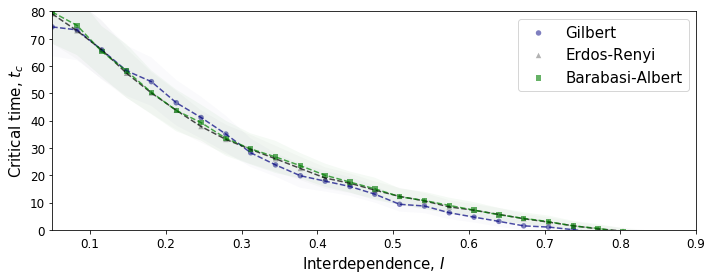

In [17]:
gil = np.genfromtxt('t_c_sigma_gil.csv', delimiter=',')
gil2 = np.genfromtxt('t_c_dist_gil.csv', delimiter=',')
sig_gil = gil[1,:]
t_c_gil = gil2[1,:]

er = np.genfromtxt('t_c_sigma_er.csv', delimiter=',')
er2 = np.genfromtxt('t_c_dist_er.csv', delimiter=',')
t_c_er = er2[1,:]
sig_er = er[1,:]

ba = np.genfromtxt('t_c_sigma_ba.csv', delimiter=',')
ba2 = np.genfromtxt('t_c_dist_ba.csv', delimiter=',')
t_c_ba = ba2[1,:]
sig_ba = ba[1,:]

I_list = gil[0,:]

plt.figure(figsize=(10,4))
plt.scatter(I_list,t_c_gil, color='#000080', alpha=0.5, s=30, edgecolors='none',label='Gilbert')
plt.scatter(I_list,t_c_er, color='k', marker='^', alpha=0.3, s=30, edgecolors='none',label='Erdos-Renyi')
plt.scatter(I_list,t_c_ba, color='g', marker='s', alpha=0.6, s=30, edgecolors='none',label='Barabasi-Albert')
plt.plot(I_list,t_c_gil, color='#000080', alpha=0.7, linestyle='--')
plt.plot(I_list,t_c_er, color='k', alpha=0.7, linestyle='--')
plt.plot(I_list,t_c_ba, color='g', alpha=0.7, linestyle='--')
plt.fill_between(I_list, t_c_gil-sig_gil, t_c_gil+sig_gil,facecolor='#000080',alpha=0.02)
plt.fill_between(I_list, t_c_er-sig_er, t_c_er+sig_er,facecolor='k',alpha=0.02)
plt.fill_between(I_list, t_c_ba-sig_ba, t_c_ba+sig_ba,facecolor='g',alpha=0.04)
#plt.plot(I_list_anly,t_c_anly, 'k', alpha=0.5, label='Theoretical',linewidth=3.0,linestyle='--')
plt.xlabel('Interdependence, $I$', fontsize=15)
plt.ylabel('Critical time, $t_c$', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=15)
plt.xlim(0.05,0.9)
plt.ylim(0,80)
plt.tight_layout()
plt.savefig('t_c_dist.png',dpi=800,bbox_inches='tight')
plt.show()